# Importing libraries

In [71]:
import tensorflow_decision_forests as tfdf

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading data

In [72]:
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

In [73]:
dataset = pd.read_csv('./car_evaluation.csv', names=column_names)
dataset

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# Data analysis

In [74]:
dataset.shape

(1728, 7)

In [75]:
dataset.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### checking for nan values

In [77]:
dataset.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [78]:
dataset.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

# Exploration and Visualization

#### Class

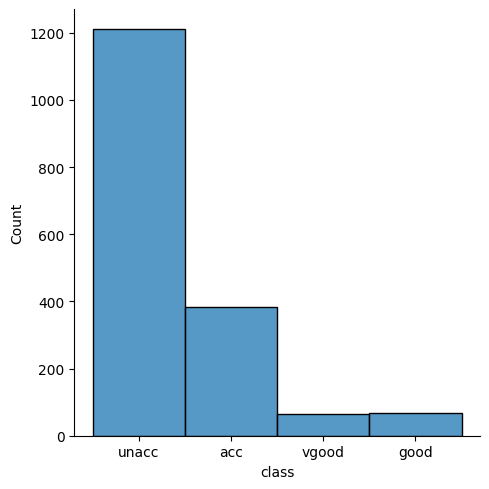

In [88]:
sns.displot(dataset['class'])

#### Persons

([<matplotlib.patches.Wedge at 0x7facbf7cb0a0>,
 [Text(0.5499999702695115, 0.9526279613277875, '2'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, '4'),
  Text(0.5500001486524352, -0.9526278583383436, 'more')])

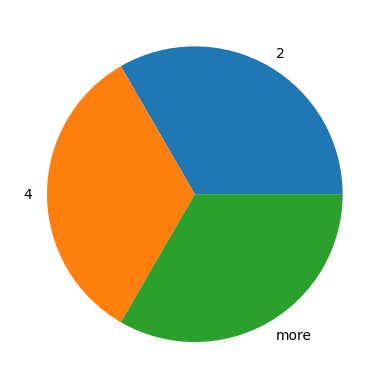

In [93]:
persons_count = dataset['persons'].value_counts()
persons_percent = persons_count / len(dataset)

labels = ['2', '4', 'more']
plt.pie(persons_percent, labels=labels)

#### Buying

([<matplotlib.patches.Wedge at 0x7facc850e070>,
 [Text(0.7778174593052024, 0.7778174593052023, 'vhigh'),
  Text(-0.7778174593052023, 0.7778174593052024, 'high'),
  Text(-0.7778174593052025, -0.7778174593052023, 'med'),
  Text(0.7778174593052022, -0.7778174593052025, 'low')])

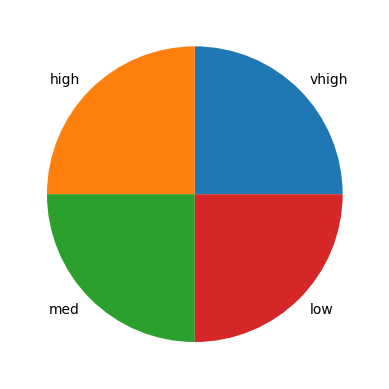

In [ ]:
buying_count = dataset['buying'].value_counts()
buying_percent = buying_count / len(dataset)

labels = ['vhigh', 'high', 'med', 'low']
plt.pie(buying_percent, labels=labels)

# Prediction

In [101]:
def split_dataset(df, test_ratio=0.30):
  test_index = np.random.rand(len(df)) < test_ratio
  return df[~test_index], df[test_index]

train, test = split_dataset(dataset)
print("{} examples in training, {} examples for testing.".format(
    len(train), len(test)))

1212 examples in training, 516 examples for testing.


 #### Convert the pandas dataframe (pd.Dataframe) into tensorflow datasets (tf.data.Dataset):

In [103]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label='class')
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, label='class')

2022-12-03 23:55:39.209019: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-03 23:55:39.219282: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-03 23:55:39.224062: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-G9ES3UM): /proc/driver/nvidia/version does not exist
2022-12-03 23:55:39.308429: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Train the model

In [105]:
# Specify the model.
model = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model.fit(x=train_ds)

Use 4 thread(s) for training
Use /tmp/tmpaf0fek8a as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'buying': <tf.Tensor 'data:0' shape=(None,) dtype=string>, 'maint': <tf.Tensor 'data_3:0' shape=(None,) dtype=string>, 'doors': <tf.Tensor 'data_1:0' shape=(None,) dtype=string>, 'persons': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'lug_boot': <tf.Tensor 'data_2:0' shape=(None,) dtype=string>, 'safety': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>}
Label: Tensor("data_6:0", shape=(None,), dtype=int64)
Weights: None
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Normalized tensor features:
 {'buying': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data:0' shape=(None,) dtype=string>), 'maint': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_3:0' shape=(None,) dtype=string>), 'doors': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_1:0' shape=(None,) dtype=string>), 'persons': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_4:0' shape=(None,) dtype=string>), 'lug_boot': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_2:0' shape=(None,) dtype=string>), 'safety': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_5:0' shape=(None,) dtype=string>)}
Training dataset read in 0:00:07.117450. Found 1212 examples.
Training model...
Standard output detected as not visible to the user e.g. running in a notebook. Creating a training log redirection. If training get stuck, try calling tfdf.keras.set_trai

[INFO 2022-12-03T23:56:50.908526-03:00 kernel.cc:814] Start Yggdrasil model training
[INFO 2022-12-03T23:56:50.9144627-03:00 kernel.cc:815] Collect training examples
[INFO 2022-12-03T23:56:50.916904-03:00 kernel.cc:423] Number of batches: 2
[INFO 2022-12-03T23:56:50.9169336-03:00 kernel.cc:424] Number of examples: 1212
[INFO 2022-12-03T23:56:50.9242088-03:00 kernel.cc:837] Training dataset:
Number of records: 1212
Number of columns: 7

Number of columns by type:
	CATEGORICAL: 7 (100%)

Columns:

CATEGORICAL: 7 (100%)
	0: "buying" CATEGORICAL has-dict vocab-size:5 zero-ood-items most-frequent:"vhigh" 312 (25.7426%)
	1: "doors" CATEGORICAL has-dict vocab-size:5 zero-ood-items most-frequent:"2" 315 (25.9901%)
	2: "lug_boot" CATEGORICAL has-dict vocab-size:4 zero-ood-items most-frequent:"big" 407 (33.5809%)
	3: "maint" CATEGORICAL has-dict vocab-size:5 zero-ood-items most-frequent:"med" 311 (25.6601%)
	4: "persons" CATEGORICAL has-dict vocab-size:4 zero-ood-items most-frequent:"2" 411 (33.

Model trained in 0:00:00.773365
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


## Evaluate the model

In [106]:
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 0.9651

loss: 0.0000
accuracy: 0.9651


## Plot the model

In [108]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=4)